In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/data

/content/drive/My Drive/data


In [0]:
import pandas as pd

train = pd.read_csv("train.csv")

In [0]:
del train

In [2]:
import os
os.chdir("C:/Users/jjw11/Desktop/고려대학교/학회/2019_Autumn_TimeSeries/Data preprocessing&EDA")

In [4]:
import pandas as pd

In [5]:
scaled_data5 = pd.read_excel("scaled_data_with_dummies.xlsx")

In [0]:
scaled_data5.head()

Unnamed: 0            timestamp  meter_reading  ...  Thursday  Tuesday  Wednesday
0           0  2016-01-01 00:00:00       0.221033  ...         0        0          0
1           1  2016-01-01 01:00:00       0.220558  ...         0        0          0
2           2  2016-01-01 02:00:00       0.224972  ...         0        0          0
3           3  2016-01-01 03:00:00       0.233563  ...         0        0          0
4           4  2016-01-01 04:00:00       0.239860  ...         0        0          0

[5 rows x 41 columns]

In [6]:
time_meter =  scaled_data5[['timestamp', 'meter_reading']]

In [7]:
date_tmp = pd.to_datetime(scaled_data5['timestamp'])
date_tmp2 = date_tmp.dt.strftime("%Y-%m-%d")
date_tmp2.head()

0    2016-01-01
1    2016-01-01
2    2016-01-01
3    2016-01-01
4    2016-01-01
Name: timestamp, dtype: object

In [8]:
time_meter['day'] = date_tmp2

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
time_meter.head()

timestamp  meter_reading         day
0  2016-01-01 00:00:00       0.221033  2016-01-01
1  2016-01-01 01:00:00       0.220558  2016-01-01
2  2016-01-01 02:00:00       0.224972  2016-01-01
3  2016-01-01 03:00:00       0.233563  2016-01-01
4  2016-01-01 04:00:00       0.239860  2016-01-01

In [9]:
day_sum = time_meter.groupby('day').sum()

In [0]:
day_sum.head()

meter_reading
day                      
2016-01-01       5.448452
2016-01-02       5.847376
2016-01-03       5.678398
2016-01-04       6.896524
2016-01-05       6.765495

In [10]:
day_sum = day_sum.reset_index()

In [0]:
day_sum.head()

day  meter_reading
0  2016-01-01       5.448452
1  2016-01-02       5.847376
2  2016-01-03       5.678398
3  2016-01-04       6.896524
4  2016-01-05       6.765495

In [11]:
mer = time_meter.merge(day_sum, how='outer', on='day')

In [0]:
mer.head()

timestamp  meter_reading_x         day  meter_reading_y
0  2016-01-01 00:00:00         0.221033  2016-01-01         5.448452
1  2016-01-01 01:00:00         0.220558  2016-01-01         5.448452
2  2016-01-01 02:00:00         0.224972  2016-01-01         5.448452
3  2016-01-01 03:00:00         0.233563  2016-01-01         5.448452
4  2016-01-01 04:00:00         0.239860  2016-01-01         5.448452

In [12]:
mer['portion'] = mer['meter_reading_x']/mer['meter_reading_y']

In [0]:
mer.head()

timestamp  meter_reading_x         day  meter_reading_y   portion
0  2016-01-01 00:00:00         0.221033  2016-01-01         5.448452  0.040568
1  2016-01-01 01:00:00         0.220558  2016-01-01         5.448452  0.040481
2  2016-01-01 02:00:00         0.224972  2016-01-01         5.448452  0.041291
3  2016-01-01 03:00:00         0.233563  2016-01-01         5.448452  0.042868
4  2016-01-01 04:00:00         0.239860  2016-01-01         5.448452  0.044023

In [13]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


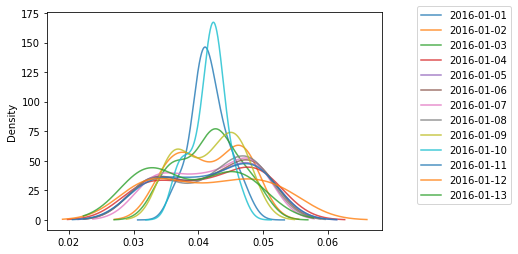

In [0]:
mer.iloc[:300,:].groupby('day')['portion'].plot(kind='density', alpha=0.8, legend='True')
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1.4, 1.05))



In [14]:
date_tmp3 = date_tmp.dt.strftime("%H")

In [0]:
date_tmp3.head()

0    00
1    01
2    02
3    03
4    04
Name: timestamp, dtype: object

In [15]:
mer['hour'] = date_tmp3

In [0]:
mer.head()

timestamp  meter_reading_x  ...   portion  hour
0  2016-01-01 00:00:00         0.221033  ...  0.040568    00
1  2016-01-01 01:00:00         0.220558  ...  0.040481    01
2  2016-01-01 02:00:00         0.224972  ...  0.041291    02
3  2016-01-01 03:00:00         0.233563  ...  0.042868    03
4  2016-01-01 04:00:00         0.239860  ...  0.044023    04

[5 rows x 6 columns]

In [16]:
mer = mer.rename(columns= { 'meter_reading_y' :'day_sum_meter_reading'})

In [0]:
mer.head()

timestamp  meter_reading_x  ...   portion  hour
0  2016-01-01 00:00:00         0.221033  ...  0.040568    00
1  2016-01-01 01:00:00         0.220558  ...  0.040481    01
2  2016-01-01 02:00:00         0.224972  ...  0.041291    02
3  2016-01-01 03:00:00         0.233563  ...  0.042868    03
4  2016-01-01 04:00:00         0.239860  ...  0.044023    04

[5 rows x 6 columns]

In [17]:
mer['day_of_week'] = date_tmp.dt.strftime("%A")

In [0]:
mer.head()

timestamp  meter_reading_x         day  ...   portion  hour day_of_week
0  2016-01-01 00:00:00         0.221033  2016-01-01  ...  0.040568    00      Friday
1  2016-01-01 01:00:00         0.220558  2016-01-01  ...  0.040481    01      Friday
2  2016-01-01 02:00:00         0.224972  2016-01-01  ...  0.041291    02      Friday
3  2016-01-01 03:00:00         0.233563  2016-01-01  ...  0.042868    03      Friday
4  2016-01-01 04:00:00         0.239860  2016-01-01  ...  0.044023    04      Friday

[5 rows x 7 columns]

In [0]:
set(mer['day_of_week'])

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [0]:
mer[mer['day_of_week']=='Friday'][:100]

timestamp  meter_reading_x         day  ...  hour  day_of_week colors
0    2016-01-01 00:00:00         0.221033  2016-01-01  ...    00       Friday    red
1    2016-01-01 01:00:00         0.220558  2016-01-01  ...    01       Friday    red
2    2016-01-01 02:00:00         0.224972  2016-01-01  ...    02       Friday    red
3    2016-01-01 03:00:00         0.233563  2016-01-01  ...    03       Friday    red
4    2016-01-01 04:00:00         0.239860  2016-01-01  ...    04       Friday    red
..                   ...              ...         ...  ...   ...          ...    ...
527  2016-01-22 23:00:00         0.234197  2016-01-22  ...    23       Friday    red
672  2016-01-29 00:00:00         0.225613  2016-01-29  ...    00       Friday    red
673  2016-01-29 01:00:00         0.219196  2016-01-29  ...    01       Friday    red
674  2016-01-29 02:00:00         0.217651  2016-01-29  ...    02       Friday    red
675  2016-01-29 03:00:00         0.227206  2016-01-29  ...    03       Friday    red

[100 rows x 8 columns]

In [0]:
np.arange(1,41)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

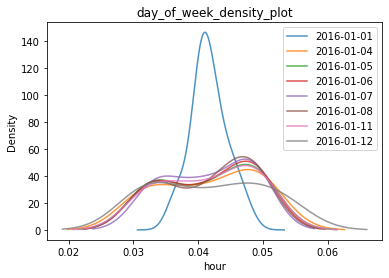

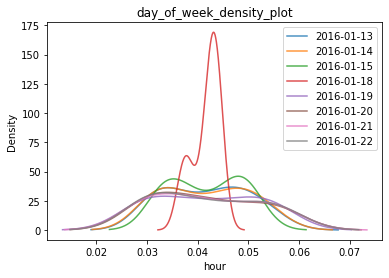

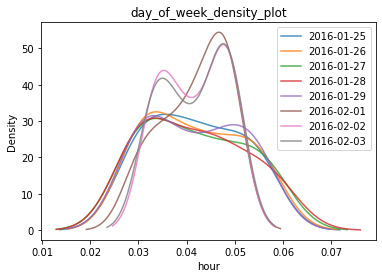

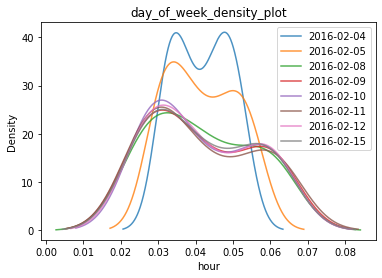

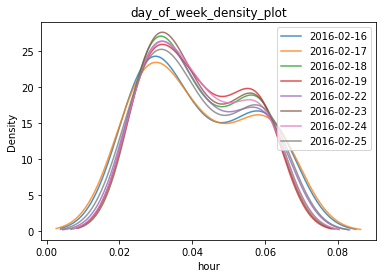

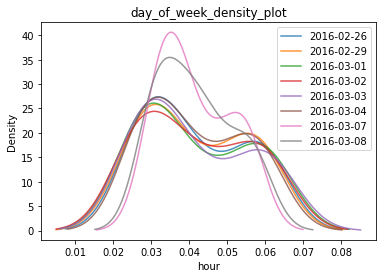

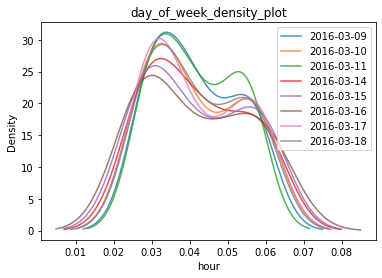

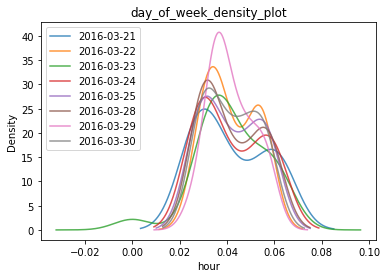

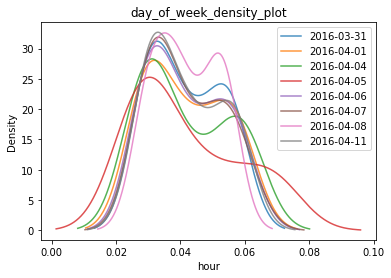

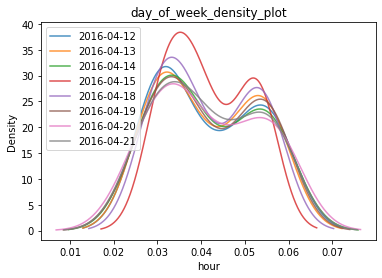

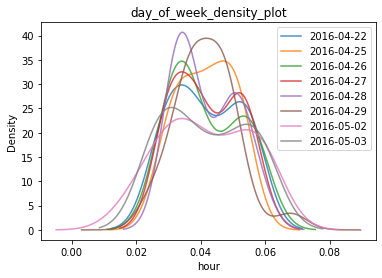

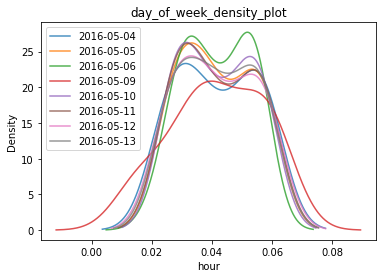

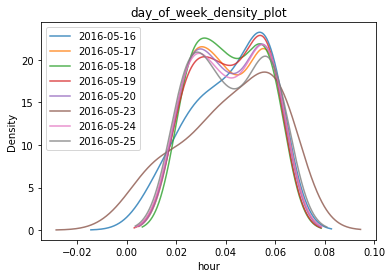

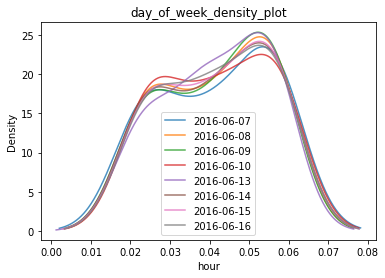

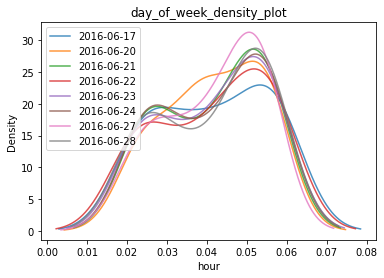

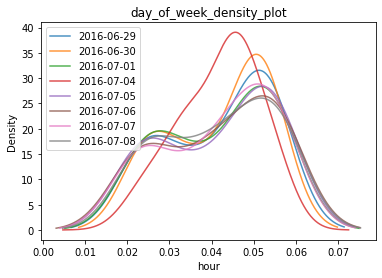

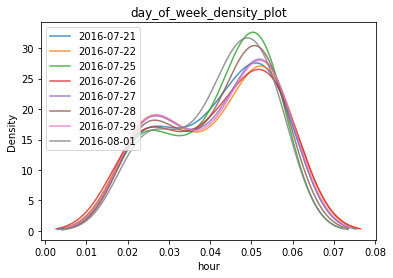

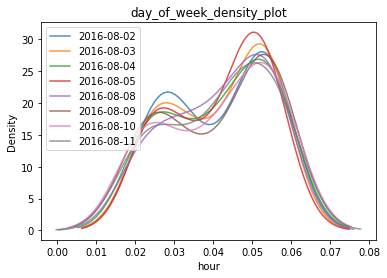

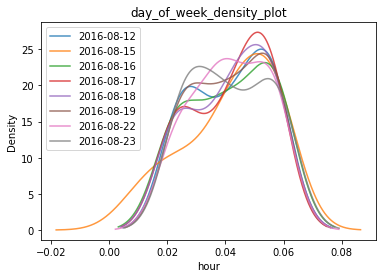

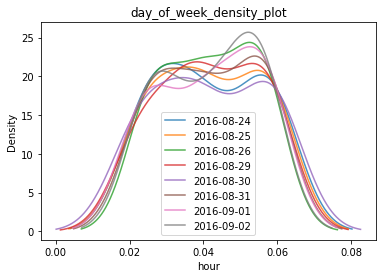

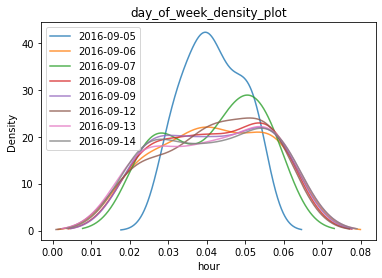

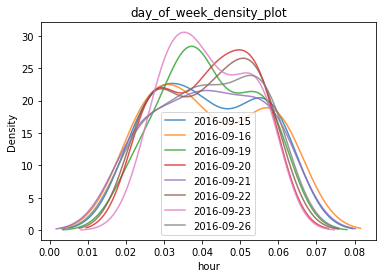

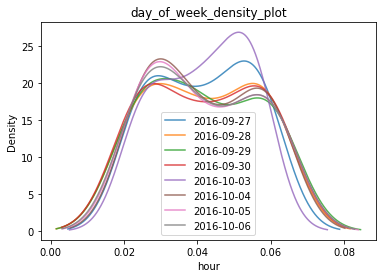

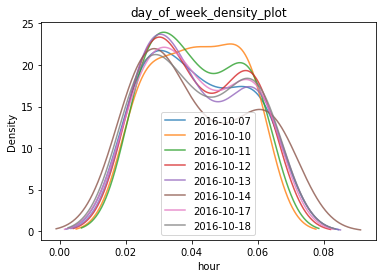

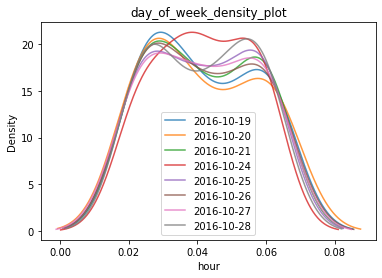

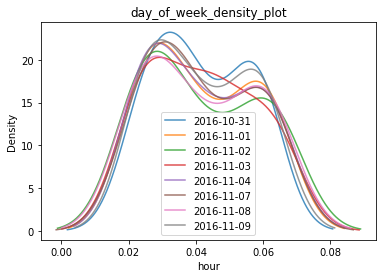

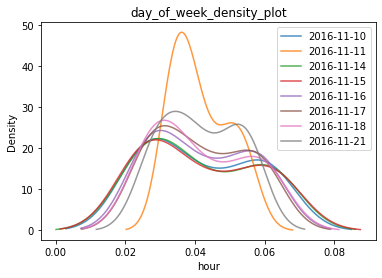

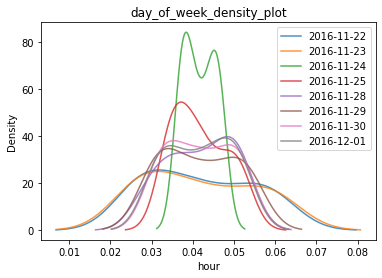

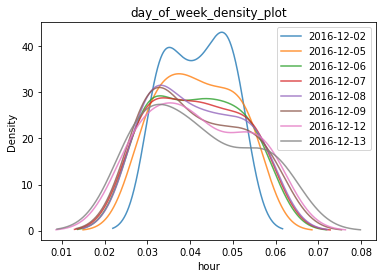

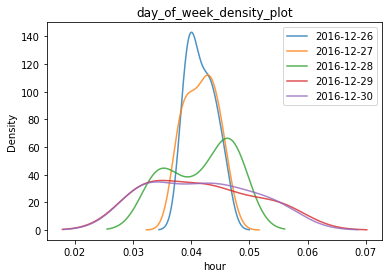

In [0]:
for i in np.arange(1,34) : 
        plt.title("day_of_week_density_plot")
        plt.xlabel("hour")       
        mer[(mer['day_of_week'] !='Saturday') & (mer['day_of_week'] !='Sunday')][192*(i-1):192 *i].groupby('day')['portion'].plot(kind='density', alpha=0.8, legend='True')
        plt.show()

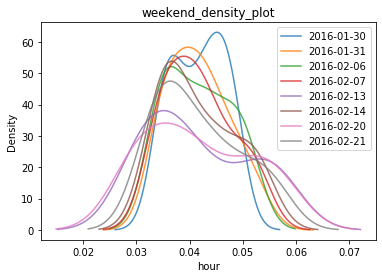

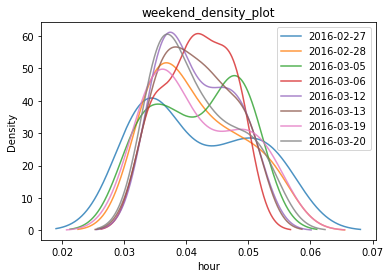

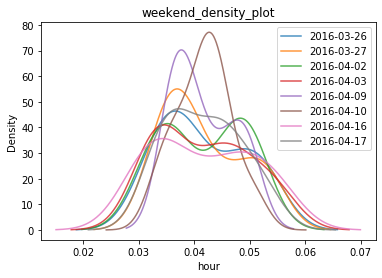

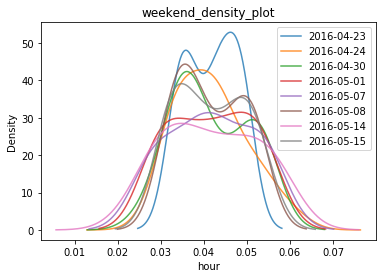

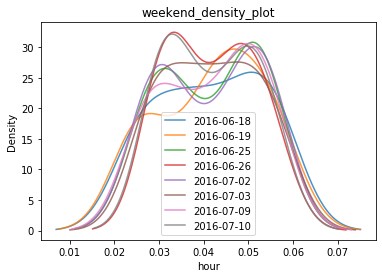

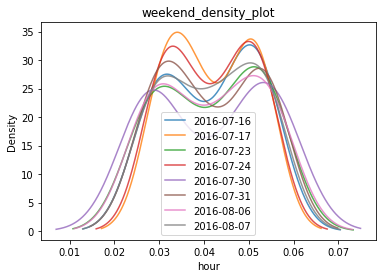

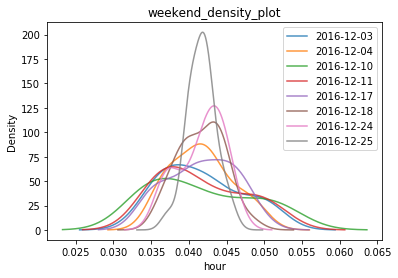

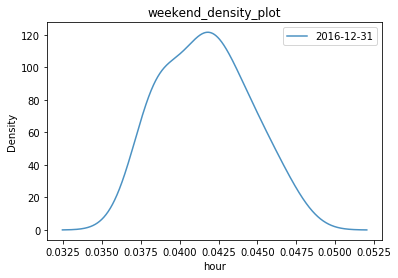

In [0]:
for i in np.arange(1,15) : 
        plt.title("weekend_density_plot")
        plt.xlabel("hour")       
        mer[(mer['day_of_week'] == 'Saturday') |(mer['day_of_week'] == 'Sunday')][192*(i-1):192 *i].groupby('day')['portion'].plot(kind='density', alpha=0.8, legend='True')
        plt.show()

In [18]:
import numpy as np

In [19]:
colors = {'Friday':'red', 'Saturday':'orange', 'Sunday':'yellow', 'Monday':'green', 'Tuesday':'blue', 'Wednesday':'violet', 'Thursday' :'pink'}


In [20]:
colors2 ={'red' : 'Friday', 'orange' : 'Saturday', 'yellow' : 'Sunday', 'green' : 'Monday', 'blue':'Tuesday', 'violet' : 'Wednesday', 'pink' : 'Thursday'}

In [0]:
mer.head()

timestamp  meter_reading_x         day  ...  hour  day_of_week colors
0  2016-01-01 00:00:00         0.221033  2016-01-01  ...    00       Friday    red
1  2016-01-01 01:00:00         0.220558  2016-01-01  ...    01       Friday    red
2  2016-01-01 02:00:00         0.224972  2016-01-01  ...    02       Friday    red
3  2016-01-01 03:00:00         0.233563  2016-01-01  ...    03       Friday    red
4  2016-01-01 04:00:00         0.239860  2016-01-01  ...    04       Friday    red

[5 rows x 8 columns]

In [21]:
mer['colors'] = mer['day_of_week'].apply(lambda x : colors[x])

In [22]:
mer.head()

timestamp  meter_reading_x         day  ...  hour  day_of_week colors
0  2016-01-01 00:00:00         0.221033  2016-01-01  ...    00       Friday    red
1  2016-01-01 01:00:00         0.220558  2016-01-01  ...    01       Friday    red
2  2016-01-01 02:00:00         0.224972  2016-01-01  ...    02       Friday    red
3  2016-01-01 03:00:00         0.233563  2016-01-01  ...    03       Friday    red
4  2016-01-01 04:00:00         0.239860  2016-01-01  ...    04       Friday    red

[5 rows x 8 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


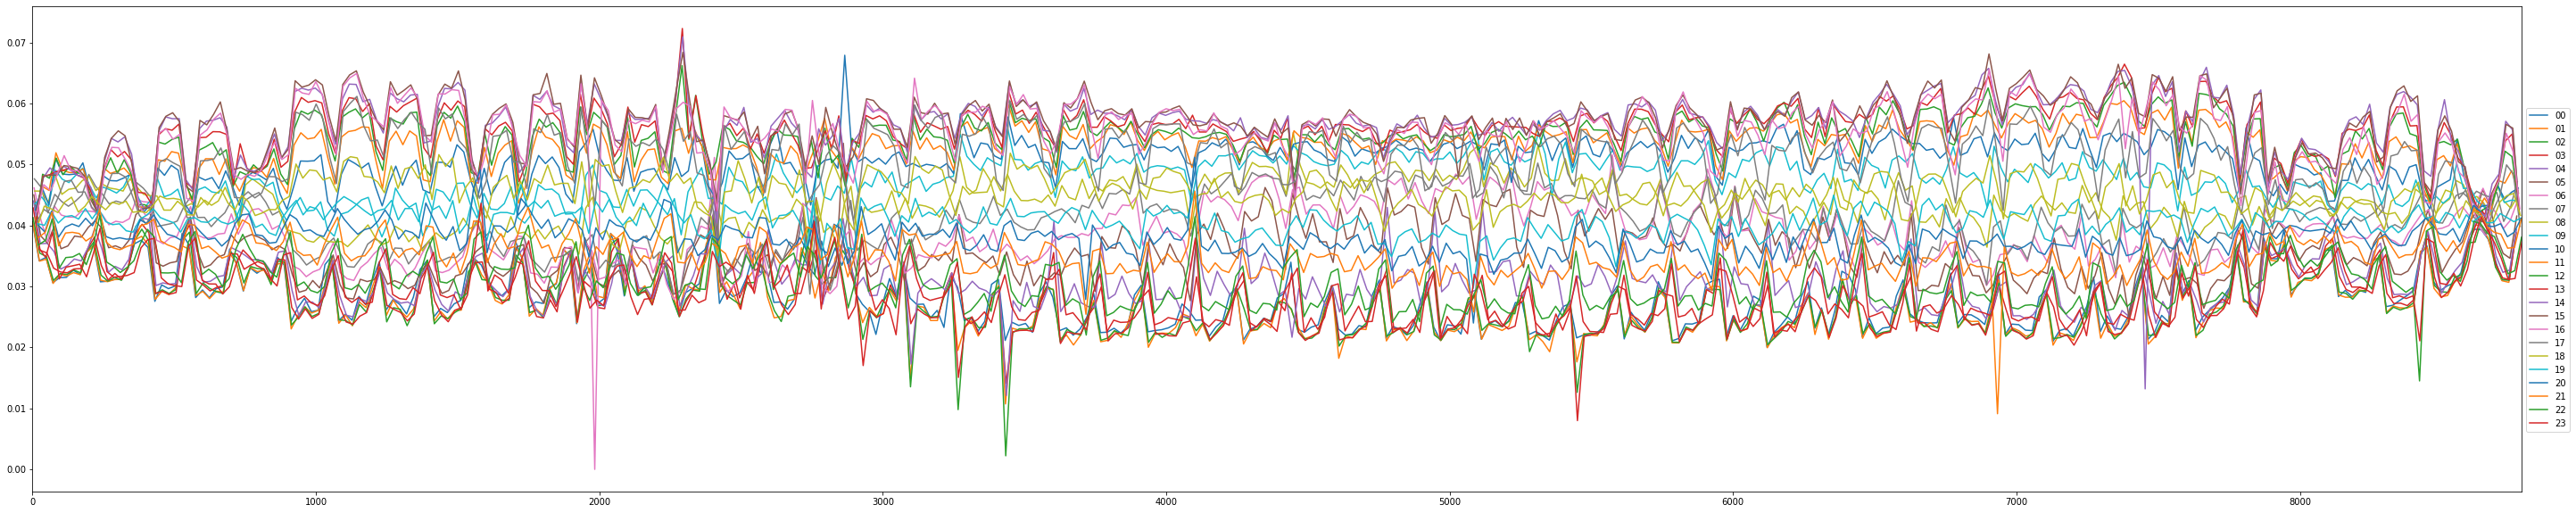

In [37]:
fig = plt.figure(figsize=(50,10))
mer.groupby('hour')['portion'].plot(legend=True)
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1., 0.8))

In [47]:
mer.groupby('hour')['portion'].sum()

hour
00    10.278322
01    10.022932
02    10.006308
03    10.220410
04    11.360101
05    13.092309
06    14.142342
07    14.941297
08    15.990916
09    17.379044
10    18.503939
11    19.304340
12    19.862773
13    20.360829
14    20.682243
15    20.752766
16    20.135191
17    18.736108
18    16.622065
19    14.898261
20    13.863266
21    12.884619
22    11.352934
23    10.606686
Name: portion, dtype: float64

In [48]:
mer.head()

timestamp  meter_reading_x         day  ...  hour  day_of_week colors
0  2016-01-01 00:00:00         0.221033  2016-01-01  ...    00       Friday    red
1  2016-01-01 01:00:00         0.220558  2016-01-01  ...    01       Friday    red
2  2016-01-01 02:00:00         0.224972  2016-01-01  ...    02       Friday    red
3  2016-01-01 03:00:00         0.233563  2016-01-01  ...    03       Friday    red
4  2016-01-01 04:00:00         0.239860  2016-01-01  ...    04       Friday    red

[5 rows x 8 columns]

In [22]:
hour_sorted = mer.sort_values(by=['hour','day'])

In [52]:
hour_sorted.head()

timestamp  meter_reading_x         day  ...  hour  day_of_week  colors
0   2016-01-01 00:00:00         0.221033  2016-01-01  ...    00       Friday     red
24  2016-01-02 00:00:00         0.200044  2016-01-02  ...    00     Saturday  orange
48  2016-01-03 00:00:00         0.197367  2016-01-03  ...    00       Sunday  yellow
72  2016-01-04 00:00:00         0.211167  2016-01-04  ...    00       Monday   green
96  2016-01-05 00:00:00         0.212726  2016-01-05  ...    00      Tuesday    blue

[5 rows x 8 columns]

In [23]:
import statsmodels.api as sm

In [57]:
hour_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8783
Data columns (total 8 columns):
timestamp                8784 non-null object
meter_reading_x          8784 non-null float64
day                      8784 non-null object
day_sum_meter_reading    8784 non-null float64
portion                  8784 non-null float64
hour                     8784 non-null object
day_of_week              8784 non-null object
colors                   8784 non-null object
dtypes: float64(3), object(5)
memory usage: 617.6+ KB


In [59]:
hour_sorted[hour_sorted['hour']=='00']

timestamp  meter_reading_x         day  ...  hour  day_of_week  colors
0     2016-01-01 00:00:00         0.221033  2016-01-01  ...    00       Friday     red
24    2016-01-02 00:00:00         0.200044  2016-01-02  ...    00     Saturday  orange
48    2016-01-03 00:00:00         0.197367  2016-01-03  ...    00       Sunday  yellow
72    2016-01-04 00:00:00         0.211167  2016-01-04  ...    00       Monday   green
96    2016-01-05 00:00:00         0.212726  2016-01-05  ...    00      Tuesday    blue
...                   ...              ...         ...  ...   ...          ...     ...
8664  2016-12-27 00:00:00         0.228977  2016-12-27  ...    00      Tuesday    blue
8688  2016-12-28 00:00:00         0.231623  2016-12-28  ...    00    Wednesday  violet
8712  2016-12-29 00:00:00         0.225330  2016-12-29  ...    00     Thursday    pink
8736  2016-12-30 00:00:00         0.221453  2016-12-30  ...    00       Friday     red
8760  2016-12-31 00:00:00         0.214696  2016-12-31  ...    00     Saturday  orange

[366 rows x 8 columns]

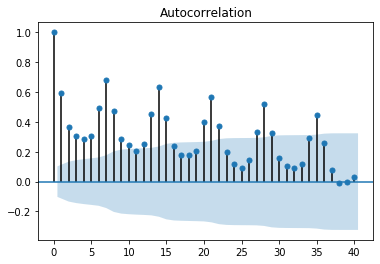

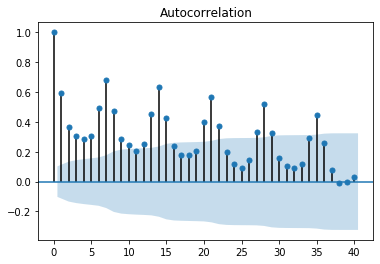

In [60]:
sm.graphics.tsa.plot_acf(hour_sorted[hour_sorted['hour']=='00']['portion'], lags=40)

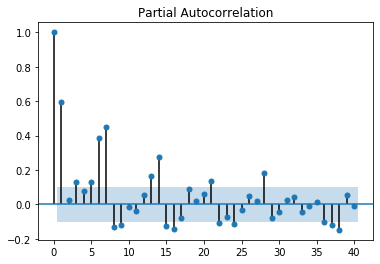

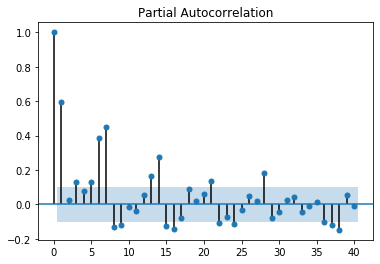

In [61]:
sm.graphics.tsa.plot_pacf(hour_sorted[hour_sorted['hour']=='00']['portion'], lags=40)

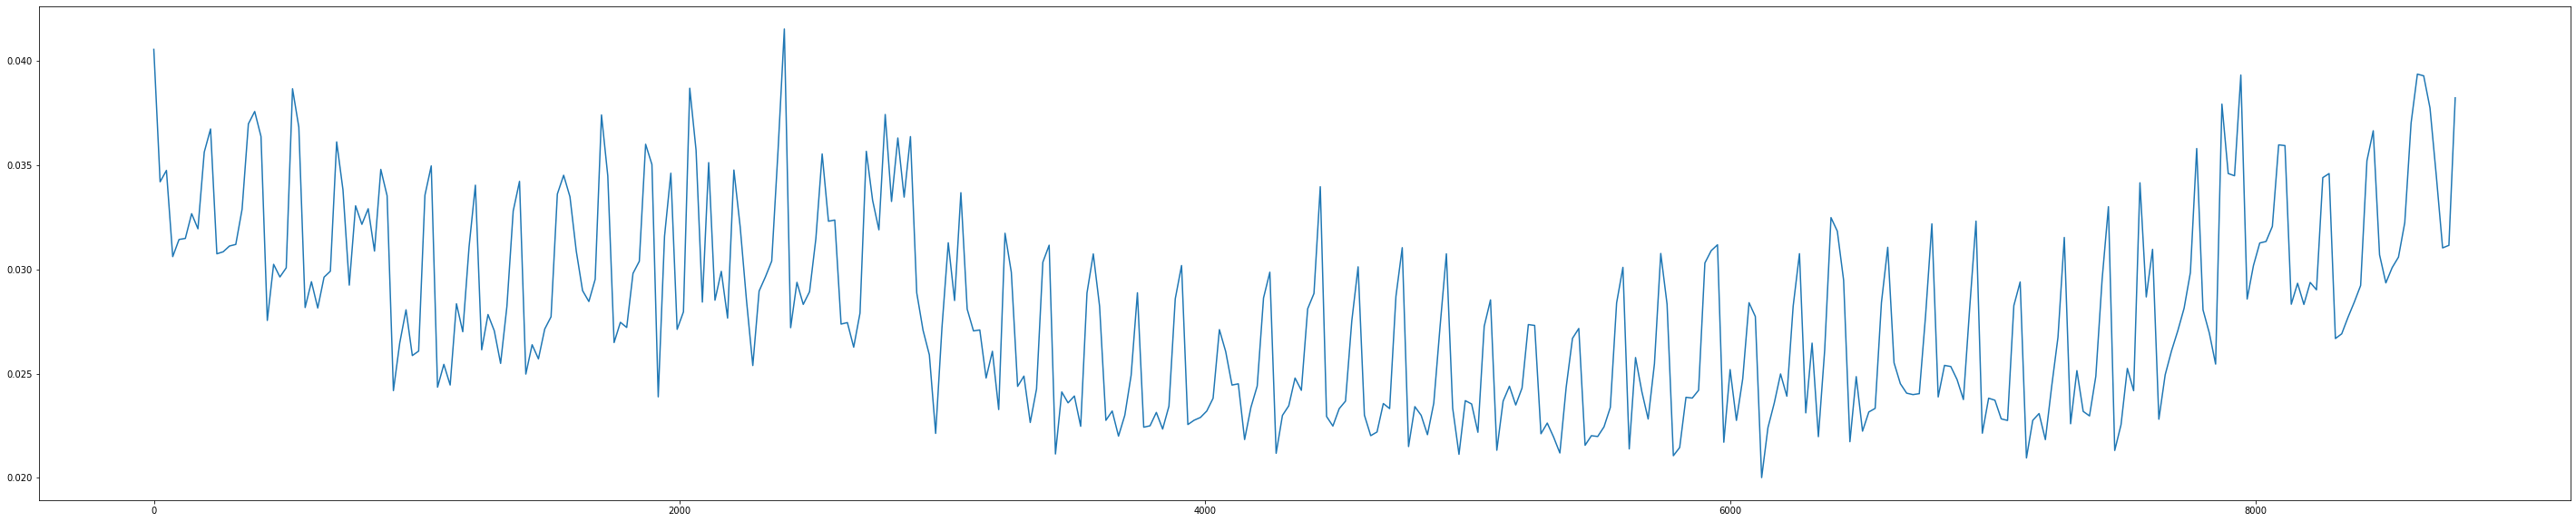

In [63]:
fig = plt.figure(figsize=(50,10))
plt.plot(hour_sorted[hour_sorted['hour']=='00']['portion'])

In [24]:
hour_00 = hour_sorted[hour_sorted['hour']=='00']['portion']

In [75]:
hour_00.head()

0     0.040568
24    0.034211
48    0.034758
72    0.030619
96    0.031443
Name: portion, dtype: float64

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [84]:
hour_00.shape

(366,)

In [77]:
hour_00[:-336]

0      0.040568
24     0.034211
48     0.034758
72     0.030619
96     0.031443
120    0.031494
144    0.032682
168    0.031956
192    0.035637
216    0.036748
240    0.030755
264    0.030852
288    0.031129
312    0.031205
336    0.032895
360    0.036992
384    0.037587
408    0.036386
432    0.027557
456    0.030251
480    0.029643
504    0.030081
528    0.038677
552    0.036833
576    0.028176
600    0.029416
624    0.028154
648    0.029634
672    0.029920
696    0.036128
Name: portion, dtype: float64

In [87]:
model = ARIMA(hour_00[:-30], order =(1,1,11))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [88]:
model_fit = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


In [96]:
hour_00[336:367].shape

(30,)

In [91]:
model_fit.predict(start = 336, end = 366)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


335   -0.000412
336    0.001137
337    0.002995
338   -0.002710
339    0.000110
340    0.000287
341   -0.000376
342    0.001805
343    0.000209
344   -0.000660
345   -0.000105
346   -0.000028
347   -0.000009
348   -0.000004
349   -0.000003
350   -0.000003
351   -0.000003
352   -0.000003
353   -0.000003
354   -0.000003
355   -0.000003
356   -0.000003
357   -0.000003
358   -0.000003
359   -0.000003
360   -0.000003
361   -0.000003
362   -0.000003
363   -0.000003
364   -0.000003
365   -0.000003
dtype: float64

In [28]:
hour_sorted.tail()

timestamp  meter_reading_x         day  day_sum_meter_reading  \
8687  2016-12-27 23:00:00         0.225219  2016-12-27               6.065077   
8711  2016-12-28 23:00:00         0.231825  2016-12-28               6.713383   
8735  2016-12-29 23:00:00         0.226093  2016-12-29               7.259542   
8759  2016-12-30 23:00:00         0.222506  2016-12-30               7.106789   
8783  2016-12-31 23:00:00         0.209710  2016-12-31               5.614101   

       portion hour day_of_week  colors  
8687  0.037134   23     Tuesday    blue  
8711  0.034532   23   Wednesday  violet  
8735  0.031144   23    Thursday    pink  
8759  0.031309   23      Friday     red  
8783  0.037354   23    Saturday  orange

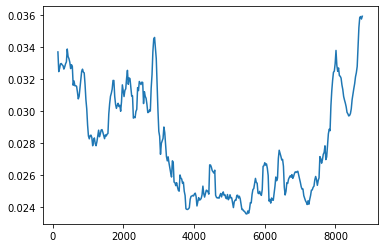

In [114]:
plt.plot(hour_sorted[hour_sorted['hour']=='00'].rolling(7).mean()['portion'].dropna())

In [123]:
hour_sorted[hour_sorted['hour']=='00']['portion'].reset_index()

index   portion
0        0  0.040568
1       24  0.034211
2       48  0.034758
3       72  0.030619
4       96  0.031443
..     ...       ...
361   8664  0.037753
362   8688  0.034502
363   8712  0.031039
364   8736  0.031161
365   8760  0.038242

[366 rows x 2 columns]

In [0]:
hour_sorted2 = hour_sorted[hour_sorted['hour']=='00']['portion'].reset_index().copy()

In [133]:
hour_sorted2

index   portion
0        0  0.040568
1       24  0.034211
2       48  0.034758
3       72  0.030619
4       96  0.031443
..     ...       ...
361   8664  0.037753
362   8688  0.034502
363   8712  0.031039
364   8736  0.031161
365   8760  0.038242

[366 rows x 2 columns]

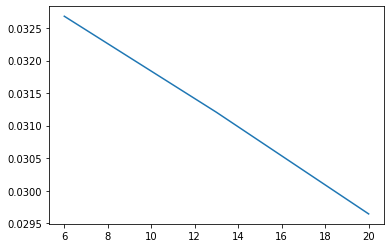

In [134]:
plt.plot(hour_sorted2.iloc[[6,13,20],1])

In [26]:
import numpy as np

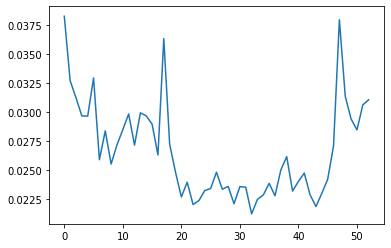

In [146]:
plt.plot([ hour_sorted2.iloc[x,1] for x in np.arange(53)*7-1])

In [0]:
one = [ hour_sorted2.iloc[x,1] for x in np.arange(53)*7-1]

In [158]:
one_df.head()

0
0  0.038242
1  0.032682
2  0.031205
3  0.029643
4  0.029634

In [162]:
one_df.shape

(53, 1)

In [159]:
one_df.iloc[0:6].mean()

0    0.032388
dtype: float64

In [160]:
one_df.iloc[7]

0    0.028358
Name: 7, dtype: float64

In [170]:
for i in np.arange(6)+1:
  print('estimate :',one_df.iloc[7*i:7*(i+1)-1].mean(),'Real value : ',one_df.iloc[7*(i+1)])

estimate : 0    0.027735
dtype: float64 Real value :  0    0.029649
Name: 14, dtype: float64
estimate : 0    0.028863
dtype: float64 Real value :  0    0.023929
Name: 21, dtype: float64
estimate : 0    0.023278
dtype: float64 Real value :  0    0.023569
Name: 28, dtype: float64
estimate : 0    0.022722
dtype: float64 Real value :  0    0.023831
Name: 35, dtype: float64
estimate : 0    0.024146
dtype: float64 Real value :  0    0.022833
Name: 42, dtype: float64
estimate : 0    0.026138
dtype: float64 Real value :  0    0.029381
Name: 49, dtype: float64


In [156]:
one_df.mean()

0    0.026636
dtype: float64

In [157]:
hour_sorted2.head()

index   portion
0      0  0.040568
1     24  0.034211
2     48  0.034758
3     72  0.030619
4     96  0.031443

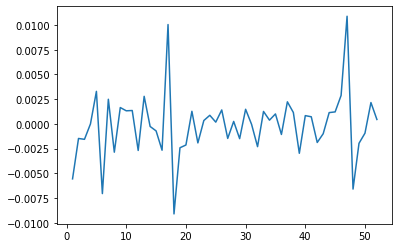

In [150]:
plt.plot(pd.DataFrame(one).diff(1))

In [184]:
"{0:0=2d}".format(11)

'11'

In [189]:
for i in range(24):
  hour_sorted_tmp = hour_sorted[hour_sorted['hour']== "{0:0=2d}".format(i)]['portion'].reset_index().copy()
  print("hour","{0:0=2d}".format(i),'estimate!!')
  for j in np.arange(7):
    tmp_list = [hour_sorted_tmp.iloc[x,1] for x in np.arange(53)*7-j]
    tmp_df = pd.DataFrame(tmp_list)
    print('estimate :',tmp_df.iloc[7*j:7*(j+1)-1].mean(),'Real value : ',tmp_df.iloc[7*(j+1)])

hour 00 estimate!!
estimate : 0    0.032718
dtype: float64 Real value :  0    0.027014
Name: 7, dtype: float64
estimate : 0    0.027735
dtype: float64 Real value :  0    0.029649
Name: 14, dtype: float64
estimate : 0    0.027875
dtype: float64 Real value :  0    0.023602
Name: 21, dtype: float64
estimate : 0    0.023279
dtype: float64 Real value :  0    0.022027
Name: 28, dtype: float64
estimate : 0    0.022145
dtype: float64 Real value :  0    0.021065
Name: 35, dtype: float64
estimate : 0    0.029719
dtype: float64 Real value :  0    0.032324
Name: 42, dtype: float64
estimate : 0    0.028544
dtype: float64 Real value :  0    0.035984
Name: 49, dtype: float64
hour 01 estimate!!
estimate : 0    0.03249
dtype: float64 Real value :  0    0.026535
Name: 7, dtype: float64
estimate : 0    0.027269
dtype: float64 Real value :  0    0.029623
Name: 14, dtype: float64
estimate : 0    0.02751
dtype: float64 Real value :  0    0.022811
Name: 21, dtype: float64
estimate : 0    0.02242
dtype: float

In [219]:
tmp_df=pd.DataFrame()

for i in range(24):
  hour_sorted_tmp = hour_sorted[hour_sorted['hour']== "{0:0=2d}".format(i)]['portion'].reset_index().copy()
  print("hour","{0:0=2d}".format(i),'estimate!!')
  for j in np.arange(7):
    tmp_list = [hour_sorted_tmp.iloc[x,1] for x in np.arange(53)*7-j]
    tmp_df = pd.DataFrame(tmp_list)
    estimate = tmp_df.iloc[7*j:7*(j+1)-1].mean()
    next_value = tmp_df.iloc[7*(j+1)]
    print('estimate :',estimate,'Real value : ',next_value)

hour 00 estimate!!
estimate : 0    0.032718
dtype: float64 Real value :  0    0.027014
Name: 7, dtype: float64
estimate : 0    0.027735
dtype: float64 Real value :  0    0.029649
Name: 14, dtype: float64
estimate : 0    0.027875
dtype: float64 Real value :  0    0.023602
Name: 21, dtype: float64
estimate : 0    0.023279
dtype: float64 Real value :  0    0.022027
Name: 28, dtype: float64
estimate : 0    0.022145
dtype: float64 Real value :  0    0.021065
Name: 35, dtype: float64
estimate : 0    0.029719
dtype: float64 Real value :  0    0.032324
Name: 42, dtype: float64
estimate : 0    0.028544
dtype: float64 Real value :  0    0.035984
Name: 49, dtype: float64
hour 01 estimate!!
estimate : 0    0.03249
dtype: float64 Real value :  0    0.026535
Name: 7, dtype: float64
estimate : 0    0.027269
dtype: float64 Real value :  0    0.029623
Name: 14, dtype: float64
estimate : 0    0.02751
dtype: float64 Real value :  0    0.022811
Name: 21, dtype: float64
estimate : 0    0.02242
dtype: float

In [215]:
for i in range(24):
  hour_sorted_tmp = hour_sorted[hour_sorted['hour']== "{0:0=2d}".format(i)]['portion'].reset_index().copy()
  print("hour","{0:0=2d}".format(i),'estimate!!')
  for j in np.arange(7):
    tmp_list = [hour_sorted_tmp.iloc[x,1] for x in np.arange(53)*7-j]
    tmp_df = pd.DataFrame(tmp_list)
    print('estimate :',tmp_df.iloc[7*j:7*(j+1)-1].mean(),'Real value : ',tmp_df.iloc[7*(j+1)])
    if j ==6 :
      

hour 00 estimate!!
estimate : 0    0.032718
dtype: float64 Real value :  0    0.027014
Name: 7, dtype: float64
estimate : 0    0.027735
dtype: float64 Real value :  0    0.029649
Name: 14, dtype: float64
estimate : 0    0.027875
dtype: float64 Real value :  0    0.023602
Name: 21, dtype: float64
estimate : 0    0.023279
dtype: float64 Real value :  0    0.022027
Name: 28, dtype: float64
estimate : 0    0.022145
dtype: float64 Real value :  0    0.021065
Name: 35, dtype: float64
estimate : 0    0.029719
dtype: float64 Real value :  0    0.032324
Name: 42, dtype: float64
estimate : 0    0.028544
dtype: float64 Real value :  0    0.035984
Name: 49, dtype: float64
hour 01 estimate!!
estimate : 0    0.03249
dtype: float64 Real value :  0    0.026535
Name: 7, dtype: float64
estimate : 0    0.027269
dtype: float64 Real value :  0    0.029623
Name: 14, dtype: float64
estimate : 0    0.02751
dtype: float64 Real value :  0    0.022811
Name: 21, dtype: float64
estimate : 0    0.02242
dtype: float

In [42]:
np.arange(0,hour_sorted.shape[0]/24,step=7)

array([  0.,   7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.,  70.,
        77.,  84.,  91.,  98., 105., 112., 119., 126., 133., 140., 147.,
       154., 161., 168., 175., 182., 189., 196., 203., 210., 217., 224.,
       231., 238., 245., 252., 259., 266., 273., 280., 287., 294., 301.,
       308., 315., 322., 329., 336., 343., 350., 357., 364.])

In [83]:
hour_sorted.head()

timestamp  meter_reading_x         day  day_sum_meter_reading  \
0   2016-01-01 00:00:00         0.221033  2016-01-01               5.448452   
24  2016-01-02 00:00:00         0.200044  2016-01-02               5.847376   
48  2016-01-03 00:00:00         0.197367  2016-01-03               5.678398   
72  2016-01-04 00:00:00         0.211167  2016-01-04               6.896524   
96  2016-01-05 00:00:00         0.212726  2016-01-05               6.765495   

     portion hour day_of_week  colors  
0   0.040568   00      Friday     red  
24  0.034211   00    Saturday  orange  
48  0.034758   00      Sunday  yellow  
72  0.030619   00      Monday   green  
96  0.031443   00     Tuesday    blue

In [80]:
hour_sorted4 = hour_sorted[hour_sorted['hour']== "00"].copy()

In [81]:
hour_sorted4['timestamp'] = pd.to_datetime(hour_sorted4['timestamp'])

In [86]:
hour_sorted4 = hour_sorted4.set_index('timestamp')

In [88]:
hour_sorted4.tail()

meter_reading_x         day  day_sum_meter_reading   portion hour  \
timestamp                                                                       
2016-12-27         0.228977  2016-12-27               6.065077  0.037753   00   
2016-12-28         0.231623  2016-12-28               6.713383  0.034502   00   
2016-12-29         0.225330  2016-12-29               7.259542  0.031039   00   
2016-12-30         0.221453  2016-12-30               7.106789  0.031161   00   
2016-12-31         0.214696  2016-12-31               5.614101  0.038242   00   

           day_of_week  colors  
timestamp                       
2016-12-27     Tuesday    blue  
2016-12-28   Wednesday  violet  
2016-12-29    Thursday    pink  
2016-12-30      Friday     red  
2016-12-31    Saturday  orange

In [90]:
hour_sorted4['2016-11-24':'2016-11-30']['portion'].mean()

0.03377620324941185

In [97]:
idx = hour_sorted4.index.get_loc('2016-11-24')
hour_sorted4.iloc[idx:idx+7,3].mean()

0.03377620324941185

In [67]:
def generate_rolling_estimate(hour_sorted,
                              next_weeks,
                              rolling=7):
  Dict = {}
  for i in range(24):
    hour_sorted_tmp = hour_sorted[hour_sorted['hour']== "{0:0=2d}".format(i)]['portion'].reset_index().copy()
    
    Dict["{0:0=2d}".format(i)] = 0
    
    for j in np.arange(next_weeks):
        list_estimate = []
        tmp_list = [hour_sorted_tmp.iloc[x,1] for x in np.arange(0,
                                                                 hour_sorted_tmp.shape[0],
                                                                       step=7)+j]
        #7로 나눴을 때 나머지가 j인 애들을 뽑는다.
        
        tmp_df = pd.DataFrame(tmp_list)
        
        
        estimate = tmp_df.iloc[rolling*j:rolling*(j+1)-1].mean()
        
        if 7*rolling*j>hour_sorted_tmp.shape[0]:
            Dict["{0:0=2d}".format(i)].append(estimate)
        
        #next weeks만큼의 estimate을 구한다.
        #나머지가 0인 estimate이 다 쌓이면 나머지가 1인 estimate이 쌓이는 식...
    return estimate, Dict 

In [105]:
tmp_df=pd.DataFrame()

for i in range(24):
  hour_sorted_tmp = hour_sorted[hour_sorted['hour']== "{0:0=2d}".format(i)]['portion'].reset_index().copy()
  print("hour","{0:0=2d}".format(i),'portion estimate!!\n')
  for j in np.arange(7):
    tmp_list = [hour_sorted_tmp.iloc[x,1] for x in np.arange(53)*7-j]
    tmp_df = pd.DataFrame(tmp_list)
    estimate = tmp_df.iloc[7*j:7*(j+1)-1].mean()
    next_value = tmp_df.iloc[7*(j+1)]
    print('estimate :',estimate,'\nReal value : ',next_value,'\n')

hour 00 portion estimate!!

estimate : 0    0.032718
dtype: float64 
Real value :  0    0.027014
Name: 7, dtype: float64 

estimate : 0    0.027735
dtype: float64 
Real value :  0    0.029649
Name: 14, dtype: float64 

estimate : 0    0.027875
dtype: float64 
Real value :  0    0.023602
Name: 21, dtype: float64 

estimate : 0    0.023279
dtype: float64 
Real value :  0    0.022027
Name: 28, dtype: float64 

estimate : 0    0.022145
dtype: float64 
Real value :  0    0.021065
Name: 35, dtype: float64 

estimate : 0    0.029719
dtype: float64 
Real value :  0    0.032324
Name: 42, dtype: float64 

estimate : 0    0.028544
dtype: float64 
Real value :  0    0.035984
Name: 49, dtype: float64 

hour 01 portion estimate!!

estimate : 0    0.03249
dtype: float64 
Real value :  0    0.026535
Name: 7, dtype: float64 

estimate : 0    0.027269
dtype: float64 
Real value :  0    0.029623
Name: 14, dtype: float64 

estimate : 0    0.02751
dtype: float64 
Real value :  0    0.022811
Name: 21, dtype

Name: 35, dtype: float64 

estimate : 0    0.055215
dtype: float64 
Real value :  0    0.057105
Name: 42, dtype: float64 

estimate : 0    0.058386
dtype: float64 
Real value :  0    0.050927
Name: 49, dtype: float64 

hour 14 portion estimate!!

estimate : 0    0.051648
dtype: float64 
Real value :  0    0.060681
Name: 7, dtype: float64 

estimate : 0    0.060821
dtype: float64 
Real value :  0    0.054873
Name: 14, dtype: float64 

estimate : 0    0.057727
dtype: float64 
Real value :  0    0.060597
Name: 21, dtype: float64 

estimate : 0    0.058247
dtype: float64 
Real value :  0    0.058188
Name: 28, dtype: float64 

estimate : 0    0.056231
dtype: float64 
Real value :  0    0.058698
Name: 35, dtype: float64 

estimate : 0    0.055357
dtype: float64 
Real value :  0    0.056444
Name: 42, dtype: float64 

estimate : 0    0.059057
dtype: float64 
Real value :  0    0.050484
Name: 49, dtype: float64 

hour 15 portion estimate!!

estimate : 0    0.051532
dtype: float64 
Real value : 